In [1]:
# importing libraries
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from  matplotlib import pyplot 

In [2]:
#set working directory
os.chdir("C:/Users/NANINE/Desktop/EdWisor")

In [3]:
#loading dataset
bike_data = pd.read_csv("day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#STEPS FOR EXPLORATORY DATA ANALYSIS(EDA)
#1) variable identification
#2) missing value treatment
#3) univariate analysis
#4) bivariate analysis
#5) outlier treatment
#6) feature selection
#7) feature scaling
#8) feature engineering(variable transformation/scaling, variable creation/dummy variables)

In [5]:
#1) variable identification

In [6]:
bike_data.shape

(731, 16)

In [7]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
#convert categorical data to category as initially its data type is numerical
bike_data['season']= bike_data['season'].astype('category')
bike_data['yr']=bike_data['yr'].astype('category')
bike_data['mnth']=bike_data['mnth'].astype('category')
bike_data['holiday']=bike_data['holiday'].astype('category')
bike_data['workingday']=bike_data['workingday'].astype('category')
bike_data['weekday']=bike_data['weekday'].astype('category')
bike_data['weathersit']=bike_data['weathersit'].astype('category')
bike_data['dteday']=bike_data['dteday'].astype('category')

In [9]:
bike_data.dtypes

instant          int64
dteday        category
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [10]:
#drop the 'instant' column as it is just an index.
#drop 'casual' and 'registered' as the sum of both variables is 'cnt' which is our target variable.
# drop 'dteday' column as logically date of renting bike will not effect bike rent count(as from date only various important 
# features like season,holiday,weekday etc have been extracted already in dataset)

In [11]:
bike_data = bike_data.drop(['instant','dteday','casual', 'registered'], axis=1)

In [12]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [13]:
#2) missing value treatment

In [14]:
missing_values = bike_data.isnull().sum().sort_values(ascending=False)
missing_values

cnt           0
windspeed     0
hum           0
atemp         0
temp          0
weathersit    0
workingday    0
weekday       0
holiday       0
mnth          0
yr            0
season        0
dtype: int64

In [15]:
#conclusion: no missing values are found in given data

In [16]:
#3) univariate analysis

In [17]:
# Target variable  analysis
#descriptive statistics summary
bike_data['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

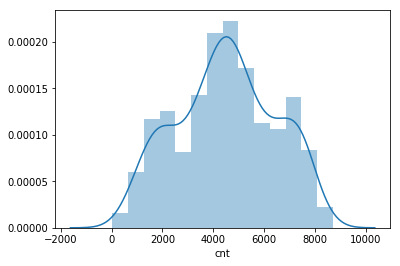

In [18]:
#Check whether target variable is normal or not
sns.distplot(bike_data['cnt']);

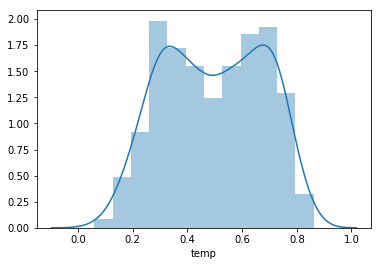

In [19]:
#Distribution  independent numeric variables 
#Check whether  variable 'temp'is normal or not
sns.distplot(bike_data['temp']);

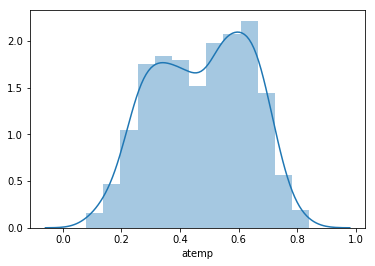

In [20]:
#Check whether  variable 'atemp'is normal or not
sns.distplot(bike_data['atemp']);

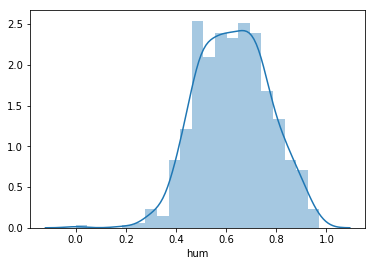

In [21]:
#Check whether  variable 'hum'is normal or not
sns.distplot(bike_data['hum']);

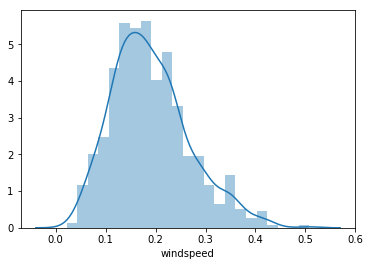

In [22]:
#Check whether  variable 'windspeed'is normal or not
sns.distplot(bike_data['windspeed']);

In [23]:
#conclusion
#we can see all the numerical variables are somewhat normally distributed.

In [24]:
#Distribution  independent categorical variables

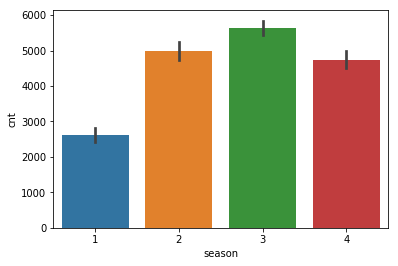

In [25]:
sns.barplot(x='season',y='cnt',data=bike_data)

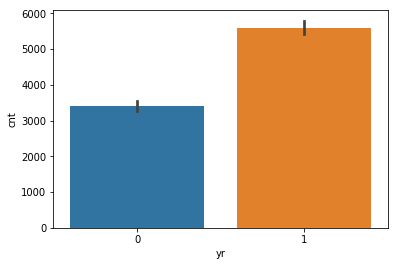

In [26]:
sns.barplot(x='yr',y='cnt',data=bike_data)

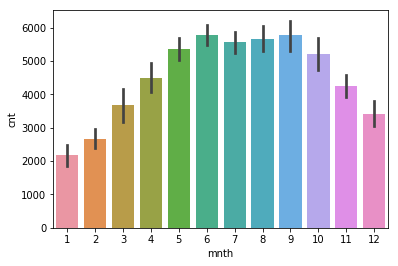

In [27]:
sns.barplot(x='mnth',y='cnt',data=bike_data)

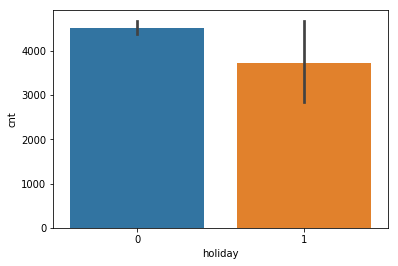

In [28]:
sns.barplot(x='holiday',y='cnt',data=bike_data)

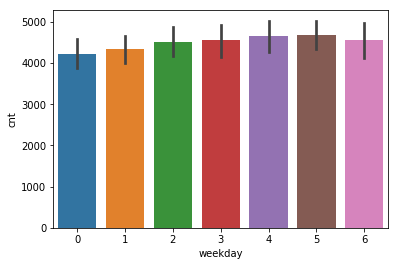

In [29]:
sns.barplot(x='weekday',y='cnt',data=bike_data)

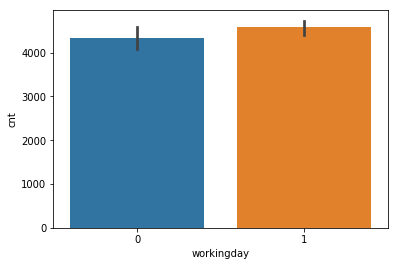

In [30]:
sns.barplot(x='workingday',y='cnt',data=bike_data)

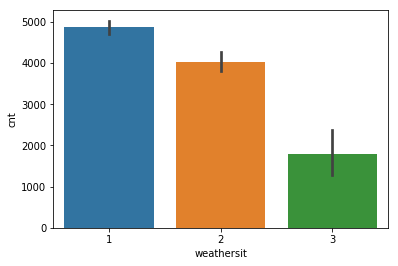

In [31]:
sns.barplot(x='weathersit',y='cnt',data=bike_data)

In [32]:
#conclusion
#we can see cnt of bike renting is more dependent on variables like weathersit,yr,season,mnth than the variables like workingday,weekday,holiday,date

In [33]:
#4) bivariate analysis

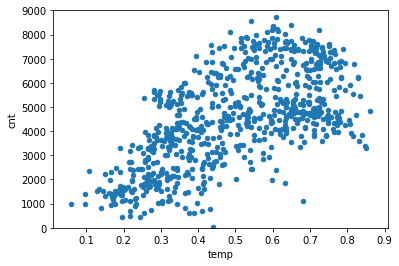

In [34]:
bike_data.plot.scatter(x='temp', y='cnt', ylim=(0,9000));

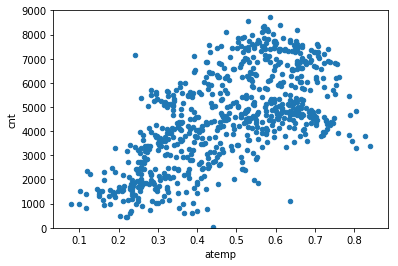

In [35]:
bike_data.plot.scatter(x='atemp', y='cnt', ylim=(0,9000));

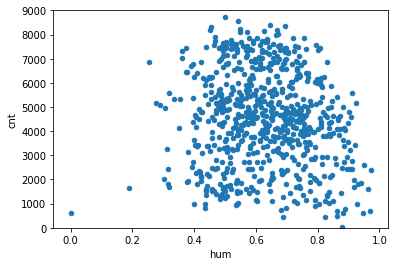

In [36]:
bike_data.plot.scatter(x='hum', y='cnt', ylim=(0,9000));

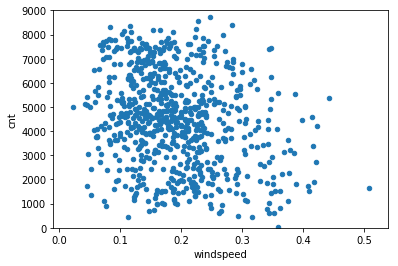

In [37]:
bike_data.plot.scatter(x='windspeed', y='cnt', ylim=(0,9000));

In [38]:
# conclusion
# Scatterplot shows how the numericals independent variables and target variable 'cnt' are distributed.

In [39]:
#5) outlier treatment

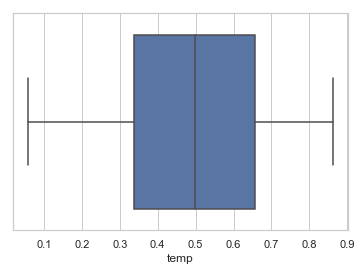

In [40]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=bike_data['temp'],orient ='h')

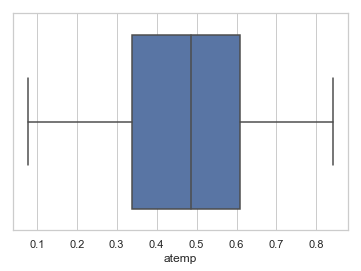

In [41]:
ax = sns.boxplot(x=bike_data['atemp'],orient ='h')

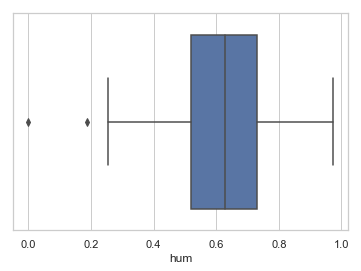

In [42]:
ax = sns.boxplot(x=bike_data['hum'],orient ='h')

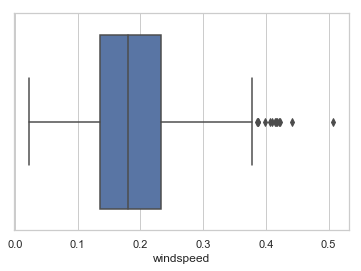

In [43]:
ax = sns.boxplot(x=bike_data['windspeed'],orient ='h')

In [44]:
#conclusion
#outlier is observed in 'hum' and 'windspeed' column
#lets remove outliers

In [45]:
cnames = ['windspeed']
for i in cnames:
    Q3, Q1 = np.percentile(bike_data.loc[:,i], [75 ,25])
    IQR = Q3 - Q1
             
min = Q1 - (IQR*1.5)
max = Q3 + (IQR*1.5)
        
print(min)
print(max)

bike_data_out = bike_data.copy()

bike_data_out = bike_data_out.drop(bike_data_out[bike_data_out.loc[:,i] < min].index)
bike_data_out = bike_data_out.drop(bike_data_out[bike_data_out.loc[:,i] > max].index)

-0.012446750000000034
0.38061125


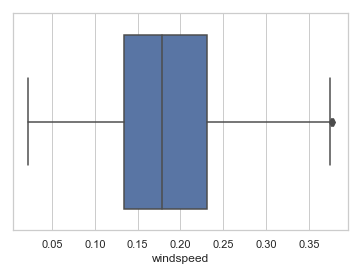

In [46]:
# Boxplot for windspeed after  aoutlier removal
sns.set(style="whitegrid")
ax = sns.boxplot(x=bike_data_out['windspeed'],orient ='h')

In [47]:
cnames = ['hum']
for i in cnames:
    Q3, Q1 = np.percentile(bike_data.loc[:,i], [75 ,25])
    IQR = Q3 - Q1
             
min = Q1 - (IQR*1.5)
max = Q3 + (IQR*1.5)
        
print(min)
print(max)

bike_data_out = bike_data.copy()

bike_data_out = bike_data_out.drop(bike_data_out[bike_data_out.loc[:,i] < min].index)
bike_data_out = bike_data_out.drop(bike_data_out[bike_data_out.loc[:,i] > max].index)

0.20468725
1.0455212500000002


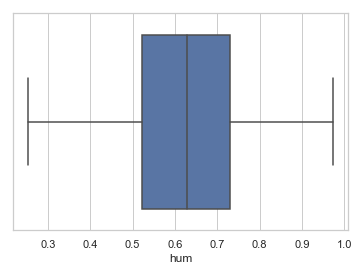

In [48]:
# Boxplot for hum after  outlier removal
sns.set(style="whitegrid")
ax = sns.boxplot(x=bike_data_out['hum'],orient ='h')

In [49]:
#6) feature selection

In [50]:
bike_data_out.shape

(729, 12)

In [51]:
bike_data_out_num = bike_data_out.drop(['season', 'yr','mnth','holiday','weekday','workingday','weathersit'], axis=1)

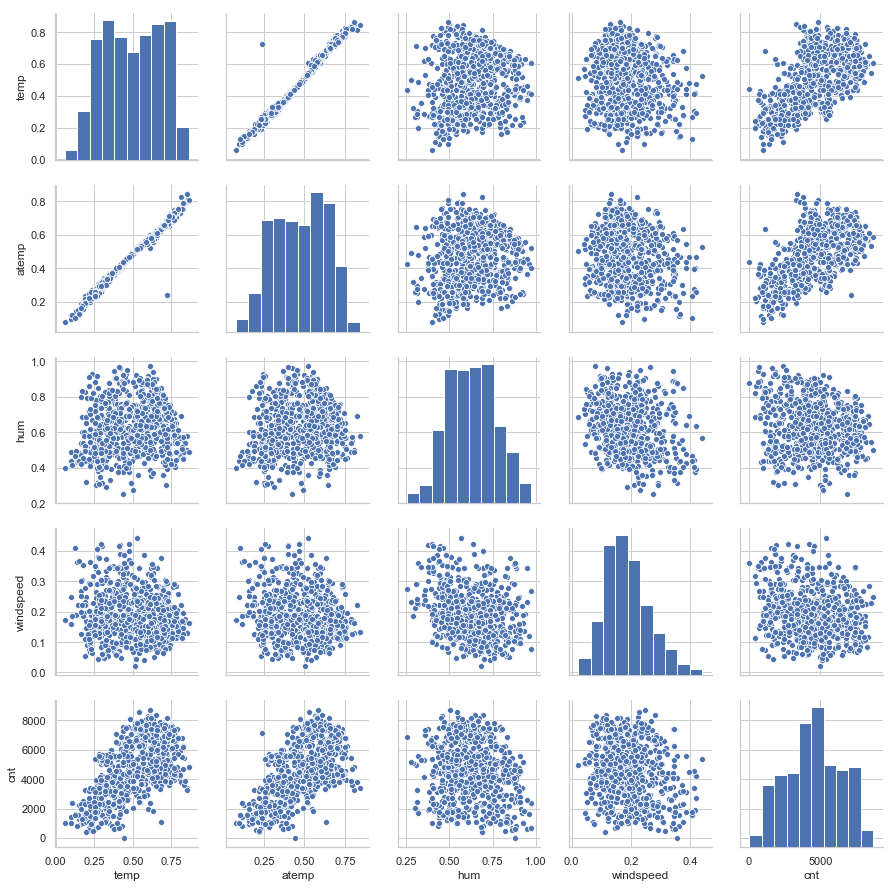

In [52]:
sns.pairplot(bike_data_out_num)

In [53]:
#conclusion
#we can see pairwise relationship across the entire dataset(for numerical columns)

In [54]:
bike_data_out_num.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,temp,atemp,hum,windspeed,cnt
temp,1.0,0.99,0.12,-0.16,0.63
atemp,0.99,1.0,0.14,-0.18,0.63
hum,0.12,0.14,1.0,-0.23,-0.12
windspeed,-0.16,-0.18,-0.23,1.0,-0.23
cnt,0.63,0.63,-0.12,-0.23,1.0


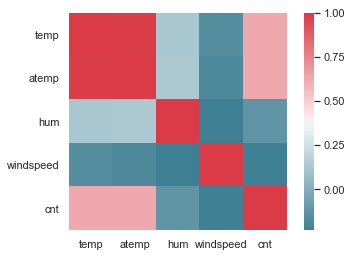

In [55]:
#Generate heatmap to show correlation between numerical variables
corr = bike_data_out_num.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True)

In [56]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = bike_data_out.drop('cnt',axis=1)
y = bike_data_out['cnt']
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['variables','Importance Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Importance Score'))  #print best features

     variables  Importance Score
2         mnth       1268.982987
4      weekday        929.366575
3      holiday        655.928571
1           yr        351.049180
0       season        343.605595
5   workingday        219.773547
6   weathersit        144.588091
7         temp         47.612668
8        atemp         39.432053
9          hum         21.565272
10   windspeed         21.541518


In [57]:
#droping corelated variable
bike_data_new = bike_data_out.drop(['atemp'], axis=1)

In [58]:
#6)feature scaling is not required as the data is already normalized data
#all the numerical columns like temp,hum and windspeed are already normalized value hence no need of scaling here.

In [59]:
# 7) feature engineering(variable transformation/scaling, variable creation/dummy variables)

In [60]:
#dummy variables are created for all the categorical variables

In [61]:
cat_feats=['season','yr','mnth','holiday','weekday','workingday','weathersit']

In [62]:
final_data = pd.get_dummies(bike_data_new,columns=cat_feats)

In [63]:
# MODEL SELECTION

In [64]:
#split data into train and test data

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
final_data.head()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,985,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
1,0.363478,0.696087,0.248539,801,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0.196364,0.437273,0.248309,1349,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0.200000,0.590435,0.160296,1562,1,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
4,0.226957,0.436957,0.186900,1600,1,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0


In [67]:
X = final_data.drop('cnt',axis=1)
y = final_data['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [68]:
# DECISION TREE

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
dtree = DecisionTreeRegressor()

In [71]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [72]:
predictions_DT = dtree.predict(X_test)

In [73]:
# RANDOM FOREST 

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rfr = RandomForestRegressor(n_estimators=600,random_state=101)

In [76]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=101, verbose=0,
                      warm_start=False)

In [77]:
predictions_RF = rfr.predict(X_test)

In [78]:
# LINEAR REGRESSION

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lm = LinearRegression()

In [81]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 4.66478415e+03 -2.05719528e+03 -3.50904280e+03  1.20283045e+14
  1.20283045e+14  1.20283045e+14  1.20283045e+14 -7.76443835e+16
 -7.76443835e+16 -2.69015681e+15 -2.69015681e+15 -2.69015681e+15
 -2.69015681e+15 -2.69015681e+15 -2.69015681e+15 -2.69015681e+15
 -2.69015681e+15 -2.69015681e+15 -2.69015681e+15 -2.69015681e+15
 -2.69015681e+15 -2.08711030e+16 -1.07672819e+16  7.62691903e+15
 -2.47690208e+15 -2.47690208e+15 -2.47690208e+15 -2.47690208e+15
 -2.47690208e+15  7.62691903e+15 -5.05191056e+15  5.05191056e+15
  6.92601695e+15  6.92601695e+15  6.92601695e+15]


In [83]:
predictions_LR = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

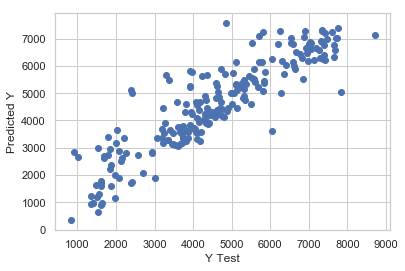

In [84]:
plt.scatter(y_test,predictions_LR)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

[0.48731419 0.06248878 0.04043917 0.0443481  0.00251658 0.00066813
 0.02441847 0.13705448 0.13409192 0.00259939 0.00119982 0.00171146
 0.00293582 0.00151298 0.00132711 0.00084183 0.00067242 0.00362066
 0.00521798 0.00214955 0.0019707  0.00165085 0.00182388 0.00415716
 0.00234028 0.00217192 0.00138678 0.00163034 0.00119601 0.00327621
 0.00209664 0.00208157 0.005404   0.00218131 0.00950351]


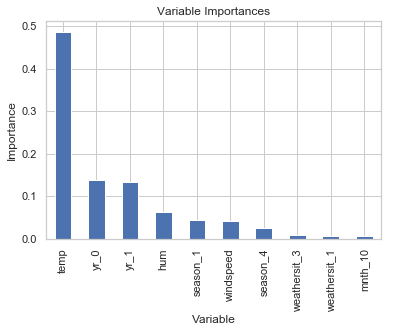

In [85]:
print(rfr.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rfr.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()

In [86]:
imp_data=final_data[['temp','yr_0','yr_1','hum','season_1','windspeed','season_4','cnt']]

In [87]:
imp_data.head()

,temp,yr_0,yr_1,hum,season_1,windspeed,season_4,cnt
0,0.344167,1,0,0.805833,1,0.160446,0,985
1,0.363478,1,0,0.696087,1,0.248539,0,801
2,0.196364,1,0,0.437273,1,0.248309,0,1349
3,0.200000,1,0,0.590435,1,0.160296,0,1562
4,0.226957,1,0,0.436957,1,0.186900,0,1600


In [88]:
X1 = imp_data.drop('cnt',axis=1)
y1 = imp_data['cnt']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=101)

In [89]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
d1tree = DecisionTreeRegressor()

In [91]:
d1tree.fit(X1_train,y1_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [92]:
predictions_DT1 = d1tree.predict(X1_test)

In [93]:
rfc1 = RandomForestRegressor(n_estimators=600, random_state=101)

In [94]:
rfc1.fit(X1_train,y1_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=101, verbose=0,
                      warm_start=False)

In [95]:
predictions_RF1 = rfc1.predict(X1_test)

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lm1 = LinearRegression()

In [98]:
lm1.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
# The coefficients
print('Coefficients: \n', lm1.coef_)

Coefficients: 
 [ 4913.02597792 -1003.50295592  1003.50295592 -3018.14762332
 -1258.73945998 -3974.63581524   367.49526558]


In [100]:
predictions_LR1 = lm1.predict( X1_test)

Text(0, 0.5, 'Predicted Y')

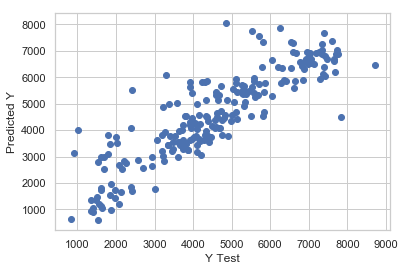

In [101]:
plt.scatter(y1_test,predictions_LR1)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [102]:
#MODEL EVALUATION

In [103]:
# MAPE with all variables 

In [104]:
#Calculate MAPE
def MAPE(y_test, predictions_DT): 
    mape = np.mean(np.abs((y_test - predictions_DT) / y_test))*100
    return mape

In [105]:
#MAPE for Decision tree model
print(MAPE(y_test, predictions_DT))

18.033884051874473


In [106]:
#MAPE for Random forest model
print(MAPE(y_test, predictions_RF))

13.365363239373215


In [107]:
#MAPE for Linear Regression model
print(MAPE(y_test, predictions_LR))

17.488732306566252


In [108]:
# MAPE with only the important seven variables

In [109]:
#MAPE for Decision tree model
print(MAPE(y1_test, predictions_DT1))

20.690694010494067


In [110]:
#MAPE for Random forest model
print(MAPE(y1_test, predictions_RF1))

14.762022151289331


In [111]:
#MAPE for Linear Regression model
print(MAPE(y1_test, predictions_LR1))

19.650475354247654


In [112]:
#Evaluate R square value with all variables

In [113]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predictions_DT))
from sklearn.metrics import r2_score
print(r2_score(y_test,predictions_RF)) 
from sklearn.metrics import r2_score
print(r2_score(y_test,predictions_LR))

0.758891737468298
0.8774849112969362
0.805628391904126


In [114]:
#Evaluate R square value with important variables

In [115]:
from sklearn.metrics import r2_score
print(r2_score(y1_test,predictions_DT1))
from sklearn.metrics import r2_score
print(r2_score(y1_test,predictions_RF1)) 
from sklearn.metrics import r2_score
print(r2_score(y1_test,predictions_LR1))

0.7057450422356748
0.8544532376582687
0.7577338164217754


In [116]:
#residual plot

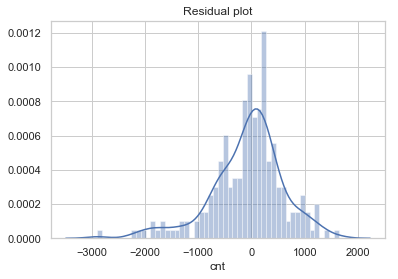

In [117]:
sns.distplot((y1_test-predictions_RF1),bins=50);
#Axis labels and title
plt.title('Residual plot');

In [118]:
#save the output sample which include X_test, actual_cnt , predicted_cnt.

In [119]:
predicted_output=pd.DataFrame(predictions_RF1.round(0))

In [120]:
predicted_output.rename(columns={0:'Predicted_cnt'},inplace=True)
predicted_output.head()

,Predicted_cnt
0,3405.0
1,6207.0
2,7551.0
3,5941.0
4,4005.0


In [121]:
predicted_output.reset_index(0,inplace=True)

In [122]:
predicted_output.head()

,index,Predicted_cnt
0,0,3405.0
1,1,6207.0
2,2,7551.0
3,3,5941.0
4,4,4005.0


In [123]:
#Step1- convert X_test and y_test to dataframes
y1_test_df=pd.DataFrame(y1_test)
y1_test_df.head()

,cnt
308,3926
488,6421
648,7691
692,3910
116,3872


In [124]:
#Step2- Join X_test and y_test_df
input_df_bike_cnt=X1_test.join(y1_test_df,how='inner')
input_df_bike_cnt.head()

,temp,yr_0,yr_1,hum,season_1,windspeed,season_4,cnt
308,0.326667,1,0,0.519167,0,0.189062,1,3926
488,0.560000,0,1,0.768333,0,0.133696,0,6421
648,0.514167,0,1,0.630833,0,0.187821,1,7691
692,0.368333,0,1,0.568750,0,0.148021,1,3910
116,0.620000,1,0,0.835417,0,0.312200,0,3872


In [125]:
#resetting index of input_df_bike_count
input_df_bike_cnt.reset_index(0,inplace=True)

In [126]:
input_df_bike_cnt.head()

,index,temp,yr_0,yr_1,hum,season_1,windspeed,season_4,cnt
0,308,0.326667,1,0,0.519167,0,0.189062,1,3926
1,488,0.560000,0,1,0.768333,0,0.133696,0,6421
2,648,0.514167,0,1,0.630833,0,0.187821,1,7691
3,692,0.368333,0,1,0.568750,0,0.148021,1,3910
4,116,0.620000,1,0,0.835417,0,0.312200,0,3872


In [127]:
sample_output=input_df_bike_cnt.join(predicted_output,how='inner',lsuffix='_left',rsuffix='_right')

In [128]:
sample_output

,index_left,temp,yr_0,yr_1,hum,season_1,windspeed,season_4,cnt,index_right,Predicted_cnt
0,308,0.326667,1,0,0.519167,0,0.189062,1,3926,0,3405.0
1,488,0.560000,0,1,0.768333,0,0.133696,0,6421,1,6207.0
2,648,0.514167,0,1,0.630833,0,0.187821,1,7691,2,7551.0
3,692,0.368333,0,1,0.568750,0,0.148021,1,3910,3,5941.0
4,116,0.620000,1,0,0.835417,0,0.312200,0,3872,4,4005.0
5,588,0.692500,0,1,0.732917,0,0.206479,0,6299,5,6765.0
6,130,0.542500,1,0,0.632917,0,0.120642,0,4182,6,4691.0
7,547,0.815833,0,1,0.518750,0,0.168529,0,5531,7,6230.0
8,57,0.343478,1,0,0.680000,1,0.125248,0,2402,8,1560.0
9,369,0.265833,0,1,0.524167,1,0.129987,0,3272,9,3286.0


In [129]:
sample_output.drop(['index_left', 'index_right'],axis=1, inplace=True)

In [130]:
sample_output.head()

,temp,yr_0,yr_1,hum,season_1,windspeed,season_4,cnt,Predicted_cnt
0,0.326667,1,0,0.519167,0,0.189062,1,3926,3405.0
1,0.560000,0,1,0.768333,0,0.133696,0,6421,6207.0
2,0.514167,0,1,0.630833,0,0.187821,1,7691,7551.0
3,0.368333,0,1,0.568750,0,0.148021,1,3910,5941.0
4,0.620000,1,0,0.835417,0,0.312200,0,3872,4005.0


In [131]:
#save sample output as Excel file

In [136]:
sample_output.to_excel('sample output PYTHON.xlsx', index=False)

In [133]:
# Now we can conclude that random forest is the best method for our model as it has lowest MAPE(i.e. highest accuracy)
# and good R square value.

In [134]:
# We can see that the accuracy of Random Forest model with all(36) variables is 87% and the accuracy with only seven important
#variable is 86%.

In [135]:
#This tells us that we actually do not need all the data we collected to make accurate predictions. If we were to continue 
#using this model, we could only collect the those seven variables and achieve nearly the same performance. 